# <center> MATH&ML-7. Теория вероятностей в контексте наивного байесовского классификатора
---

### 8. Дискретные распределения

##### Равномерное распределение

> **Равномерное распределение** — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от $1$ до $N$, а вероятности их появления одинаковы.

In [1]:
import numpy as np
from scipy.stats import randint

In [3]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [4]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

# [0.16666667 0.33333333 0.5 0.66666667 0.83333333 1]

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


In [5]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


##### Распределение Бернулли

> **Распределение Бернулли**, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями $p$ и $1 - p$ соответственно. Таким образом, распределение Бернулли **описывает события, имеющие ровно два** исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

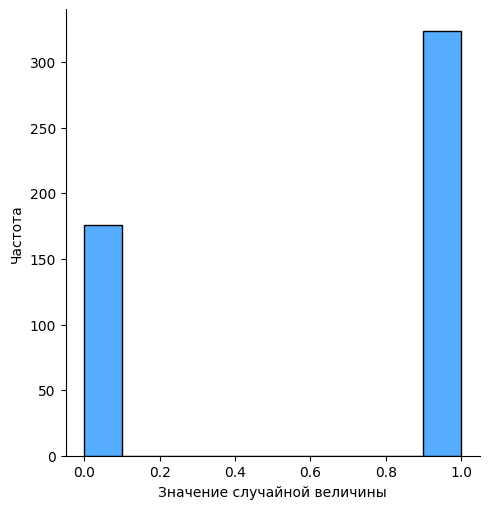

In [45]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

In [14]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

# [[  0 206]
# [  1 294]]

[[  0 186]
 [  1 314]]


##### Биномиальное распределение

> **Биномиальным** называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

In [16]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

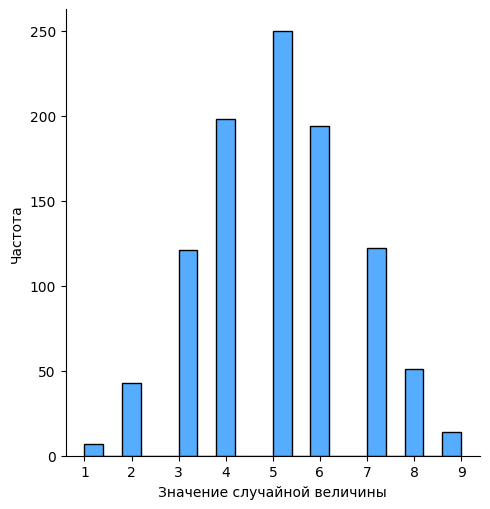

In [46]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

##### Распределение Пуассона

> **Распределение Пуассона** — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

In [18]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

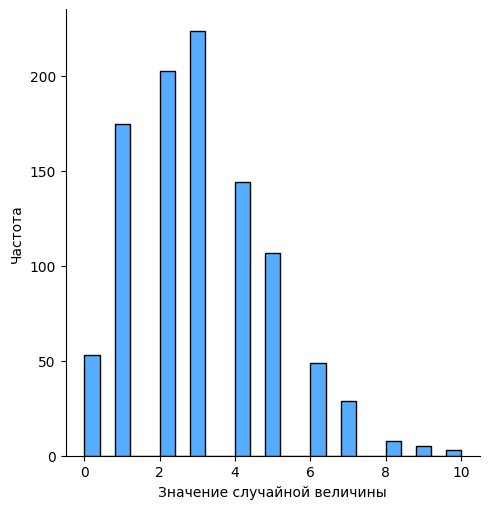

In [47]:
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

In [44]:
# Задание 8.7
# Пассажиры прибывают на вокзал со средней скоростью  человека в минуту.
# Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, 
# какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? 
# Округлите ответ до трёх знаков после точки-разделителя.

round(scipy.stats.distributions.poisson.pmf(16, 16), 3)

0.099

---

### 9. Непрерывные распределения

##### Равномерное распределение

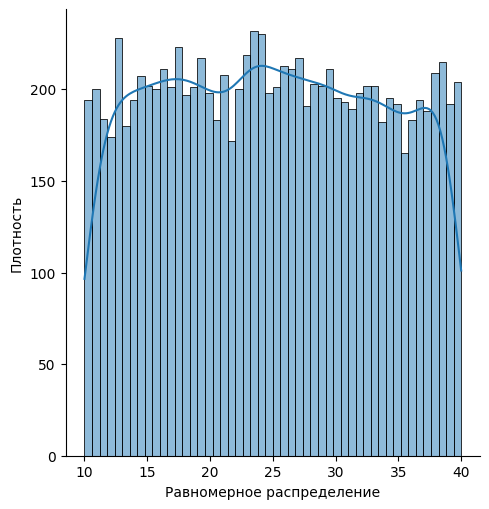

In [49]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность');

##### Нормальное распределение

> **Нормальное распределение** (его ещё называют **гауссовским** или **распределением Гаусса**) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

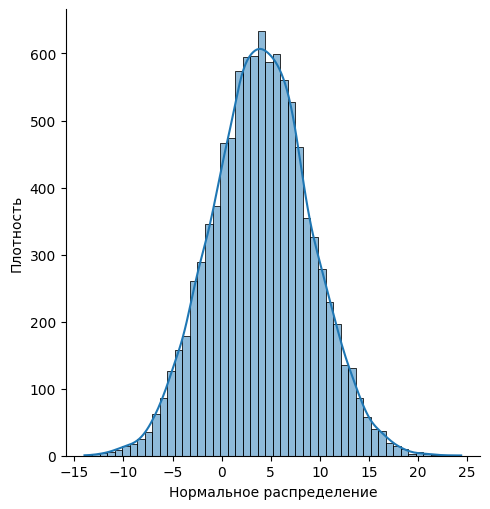

In [51]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность');

In [52]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


##### Экспоненциальное распределение

> **Экспоненциальное распределение** — это распределение вероятностей времени между событиями в процессе Пуассона.

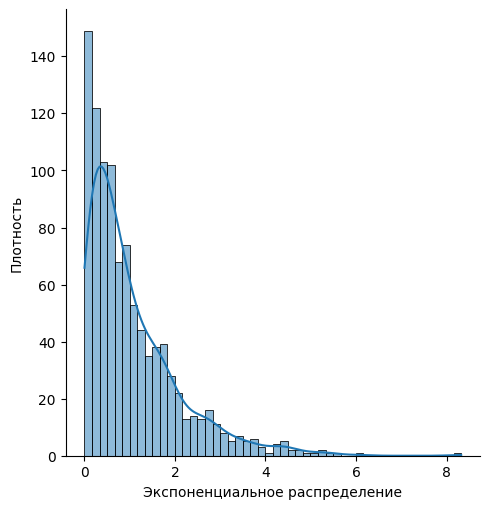

In [53]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность');